In [768]:
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re 
import string

import nltk 
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import TweetTokenizer

from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


plt.style.use("seaborn")

In [770]:
data = pd.read_csv('/Users/jayz/Documents/GitHubMetis/Final_Project/listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy.","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, free parking, ...even free pillows! What's special about this place? Hypo-allergenic bedding, mattresses/covers and new pillows with each rental. (So feel free to take your new pillows with you!) A beautiful restoration mixing period details & modern sensibilities: Hardwood floors throughout, white subway tile, low/no VOCs & non-toxic paints keep this home-away-from-home clean, smart and healthy. Radiant heat and oil radiators mean no blowing hot air or dust. Great Amenities: Free WiFi & internet TV (LED flatscreen). Fully-equipped kitchen with stainless-steel appliances, sink & disposal. Large washer & dryer. Iron/ironing board. Hairdryer. Plenty of storage. Convenient parking, both on- and off-street. The Best Location: Enjoy Seattle's celebrated Macrina bakery, neighborhood cafes, boutiqu","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungu

In [771]:
data['price']=data['price'].replace('[\$,]','',regex=True).astype(float).astype(int)

In [772]:
data=data[(data.price.between(0, 500))]
data2=data[data['accommodates']<= 20]

In [773]:
dfO= data2[['name','id','description','space','latitude','longitude','price','accommodates','host_url','picture_url']]

dfO = pd.DataFrame(dfO)

In [774]:
dfO.head()

,name,id,description,space,latitude,longitude,price,accommodates,host_url,picture_url
0,Stylish Queen Anne Apartment,241032,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",47.636289,-122.371025,85,4,https://www.airbnb.com/users/show/956883,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70
1,Bright & Airy Queen Anne Apartment,953595,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so breathe easy. Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, free parking, ...even free pillows! What's special about this place? Hypo-allergenic bedding, mattresses/covers and new pillows with each rental. (So feel free to take your new pillows with you!) A beautiful restoration mixing period details & modern sensibilities: Hardwood floors throughout, white subway tile, low/no VOCs & non-toxic paints keep this home-away-from-home clean, smart and healthy. Radiant heat and oil radiators mean no blowing hot air or dust. Great Amenities: Free WiFi & internet TV (LED flatscreen). Fully-equipped kitchen with st","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, free parking, ...even free pillows! What's special about this place? Hypo-allergenic bedding, mattresses/covers and new pillows with each rental. (So feel free to take your new pillows with you!) A beautiful restoration mixing period details & modern sensibilities: Hardwood floors throughout, white subway tile, low/no VOCs & non-toxic paints keep this home-away-from-home clean, smart and healthy. Radiant heat and oil radiators m

In [775]:
listings=dfO
listings['name'] = listings['name'].astype('str')
listings['description'] = listings['description'].astype('str')
listings['space'] = listings['space'].astype('str')
listings['content'] = listings[['name', 'description','space']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)
listings['content'].fillna('Null', inplace = True)

In [823]:
#Cleaning Text - round 1#

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
#Cleaning Text - round 2#

def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
# Personalizing Stopwords #
stopword1 = nltk.corpus.stopwords.words('english')
newStopWords = ['im','ive','theyre','hum','washington','seattle','needle','belltown','nan']
stopword1.extend(newStopWords)


stop = set(stopword1)
punctuation = list(string.punctuation)

stop.update(punctuation)
exclude_words = set(("not", "no","aren't","couldn't","didn't","doesn't","don't","hasn't","haven't","mightn't","mustn't","needn't","shouldn't","weren't"))

stop = stop - exclude_words

# Pre-processing & Lemmatizing text #

def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
    
# Lemmatizing words that are not stopwords

lemmatizer = WordNetLemmatizer()
def lemmatization1(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [940]:
listings['content']=listings['content'].apply(lambda x:clean_text_round1(x))
listings['content']=listings['content'].apply(lambda x:clean_text_round2(x))
listings['content'] = listings['content'].apply(lambda x : lemmatization1(x))

In [941]:
listings.head()

,name,id,description,space,latitude,longitude,price,accommodates,host_url,picture_url,content
0,Stylish Queen Anne Apartment,241032,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",47.636289,-122.371025,85,4,https://www.airbnb.com/users/show/956883,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,stylish queen anne apartment make self home charm onebedroom apartment centrallylocated west side queen anne hill elegantlydecorated completely private apartment bottom unit duplex open floor plan bamboo floor fully equip kitchen tv dvd player basic cable cozy bedroom queensize bed unit sleep four two bedroom two comfortable fold couch linen include include free wifi laundry apartment open onto private deck complete bbq overlook garden forest black bamboo apartment perfectlylocated one block bus line catch bus downtown fifteen minute historic ballard ten quick fiveminute walk bring whole food peets coffee take fifteen minute walk top queen anne hill find variety eclectic shop bar restaurant no make self home charm onebedroom apartment centrallylocated west side queen anne hill elegantlydecorated completely private apartment bottom unit duplex open floor plan bamboo floor fully equip kitchen tv dvd player basic cable cozy bedroom queensize bed unit sleep four two bedroom two comfortable fold couch linen include include free wifi laundry apartment open onto private deck complete bbq overlook garden forest black bamboo apartment perfectlylocated one block bus line catch bus downtown fifteen minute historic ballard ten quick fiveminute walk bring whole food peets coffee take fifteen minute walk top queen anne hill find variety eclectic shop bar restaurant no
1,Bright & Airy Queen Anne Apartment,953595,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so bre

In [942]:
tf = TfidfVectorizer(max_df=0.4,stop_words='english')
tfidf_matrix = tf.fit_transform(listings['content'])
tfidf_matrix.shape

(3659, 11611)

In [943]:
from sklearn.decomposition import NMF
nmf_model=NMF(5)
doc_topic=nmf_model.fit_transform(tfidf_matrix)
doc_topic.shape


(3659, 5)

In [944]:
topic_word=nmf_model.components_
topic_word.shape

(5, 11611)

In [945]:
words = tf.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-10:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words
# Family_House
# Tourism_and_Convention
# Peaceful_Vacation
# Young
# Specialty_Needs

[['floor',
  'private',
  'queen',
  'size',
  'living',
  'large',
  'tv',
  'guest',
  'include'],
 ['pike',
  'place',
  'market',
  'view',
  'condo',
  'center',
  'block',
  'location',
  'convention'],
 ['minute',
  'lake',
  'park',
  'house',
  'ballard',
  'quiet',
  'block',
  'close',
  'private'],
 ['apartment',
  'hill',
  'capitol',
  'studio',
  'locate',
  'building',
  'heart',
  'bar',
  'cozy'],
 ['house',
  'work',
  'share',
  'people',
  'listing',
  'tech',
  'hacker',
  'scene',
  'guest']]

In [946]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index = listings['id'],
                             columns = ["component_1","component_2","component_3","component_4","component_5" ])
doc_topic_nmf

,component_1,component_2,component_3,component_4,component_5
id,,,,,
241032,0.06516,0.00207,0.01932,0.08021,0.00000
953595,0.04879,0.02032,0.00781,0.01496,0.00000
7421966,0.02945,0.00684,0.00209,0.03621,0.00000
5956968,0.03528,0.01404,0.00982,0.00564,0.04508
1909058,0.05157,0.01415,0.06968,0.00000,0.00000
...,...,...,...,...,...
3383329,0.04419,0.00809,0.00000,0.01310,0.01308
8902327,0.01012,0.02191,0.07308,0.01629,0.00000
10267360,0.00917,0.03870,0.06442,0.01337,0.00000


In [947]:
doc_topic.argmax()

1554

In [948]:
from sklearn.metrics import pairwise_distances

pairwise_distances(doc_topic[4].reshape(1,-1),doc_topic,metric='cosine')


array([[0.48728015, 0.31305605, 0.57527004, ..., 0.18411586, 0.28100613,
        0.20728562]])

In [949]:
similar_indices=pairwise_distances(doc_topic[4].reshape(1,-1),doc_topic,metric='cosine')[0].argsort()
similar_indices

array([   4, 1620, 3541, ..., 2595, 3376,  291])

In [1139]:
t = ['Traveling with Family safe peaceful and large room']

In [1124]:
import streamlit as st
t1 = st.text_input('Please Input Text Here')

In [1140]:
vt = tf.transform(t)
vt

<1x11611 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [1141]:
tt = nmf_model.transform(vt)
tt

array([[0.01854212, 0.        , 0.02231962, 0.        , 0.        ]])

In [1127]:
#predicted_topics=[np.argsort(each)[::-1][0] for each in tt]

In [1128]:
#predicted_topics

In [1129]:
# Family_House
# Tourism_and_Convention
# Peaceful_Vacation
# Young
# Specialty_Needs

def topic_result(tt):
    predicted_topics=[np.argsort(each)[::-1][0] for each in tt]
    if predicted_topics==[0]:
        return 'Family House'
    elif predicted_topics==[1]:
        return 'Tourism and Convention'
    elif predicted_topics==[2]:
        return 'Peaceful Vacation'
    elif predicted_topics==[3]:
        return 'Young Life'
    else:
        return 'Specialty Needs'
        
    

In [1142]:
topic_result(tt)

'Peaceful Vacation'

In [1131]:
num=5


In [1132]:
similar_indices=pairwise_distances(tt,doc_topic,metric='cosine').argsort()[0][0:num]
similar_indices

# use argmax to filter topics #
# #

array([ 823, 1418, 2701,  703,  560])

In [1133]:
listings.head()

,name,id,description,space,latitude,longitude,price,accommodates,host_url,picture_url,content
0,Stylish Queen Anne Apartment,241032,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",47.636289,-122.371025,85,4,https://www.airbnb.com/users/show/956883,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,stylish queen anne apartment make self home charm onebedroom apartment centrallylocated west side queen anne hill elegantlydecorated completely private apartment bottom unit duplex open floor plan bamboo floor fully equip kitchen tv dvd player basic cable cozy bedroom queensize bed unit sleep four two bedroom two comfortable fold couch linen include include free wifi laundry apartment open onto private deck complete bbq overlook garden forest black bamboo apartment perfectlylocated one block bus line catch bus downtown fifteen minute historic ballard ten quick fiveminute walk bring whole food peets coffee take fifteen minute walk top queen anne hill find variety eclectic shop bar restaurant no make self home charm onebedroom apartment centrallylocated west side queen anne hill elegantlydecorated completely private apartment bottom unit duplex open floor plan bamboo floor fully equip kitchen tv dvd player basic cable cozy bedroom queensize bed unit sleep four two bedroom two comfortable fold couch linen include include free wifi laundry apartment open onto private deck complete bbq overlook garden forest black bamboo apartment perfectlylocated one block bus line catch bus downtown fifteen minute historic ballard ten quick fiveminute walk bring whole food peets coffee take fifteen minute walk top queen anne hill find variety eclectic shop bar restaurant no
1,Bright & Airy Queen Anne Apartment,953595,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no pets. Designed for healthy living, so bre

In [1134]:
listings['name'][396]

'Mid-century Duplex in Wallingford'

In [1137]:
similar_id = [(listings['id'].iloc[i]) for i in similar_indices]

similar_name = [(listings['name'].iloc[i]) for i in similar_indices]

similar_desc = [(listings['description'].iloc[i][0:165]) for i in similar_indices]

similar_url = [(listings['host_url'].iloc[i]) for i in similar_indices]

similar_pic = [(listings['picture_url'].iloc[i]) for i in similar_indices]


In [1138]:
similar_id

[9909445, 10132385, 3404914, 8174626, 9258305]

In [1107]:
def recommend(text,num):
    print('Recommending ' + str(num) + ' Airbnb products for ' + str(text))
    print('---')
    for i in list(range(0,num)):
        print('\nRecommended: ' + str(similar_name[i])+ '\nDescription: ' + str(similar_desc[i]) +'...'
             + '\nHostUrl: ' + str(similar_url[i])
             + '\nPicture: ' + str(similar_pic[i]))

In [1108]:
def recommend(text,num):
    a=str('Recommending ' + str(num) + ' Airbnb products for ' + str(text))
    b=str('------------------------------------')
    mylistc=[]
    mylistd=[]
    myliste=[]
    mylistf=[]
    for i in range(0,num):
        c=str(similar_name[i])
        d=str(str(similar_desc[i]) +'...')
        e=str(similar_url[i])
        f=str(similar_pic[i])
        mylistc.append(c)
        mylistd.append(d)
        myliste.append(e)
        mylistf.append(f)
    return mylistc,mylistd,myliste,mylistf

In [1121]:
l=recommend(t,5)

In [1122]:
l

(['Futon Surf for a Beach Bum?',
  'Comfortable, convenient,roof access',
  'Waterfront townhome in Seattle',
  'Spacious Basement Green Lake Room',
  'Brand new one bedroom in Cap Hill'],
 ['Located just a 30 sec. walk from Alki Beach, Seattle. Stay a night or 5 in my one bedroom apartment, the living room is sectioned off (curtain) for you. Quiet & clea...',
  'Clean apartment in Capitol Hill, close to downtown, close to Lake Washington, rooftop access down the hall, stunning views, washer&dryer in unit, gym, full kitchen, ...',
  'Right across the street from the water, this place has 180 degree views where you can see whales, sea lions, the mountains and sunset.  Close to downtown, GREAT rest...',
  'This is a large, room in the finished half of my basement. You control heating in the space. The bed is a good quality convertible couch, but some people have prefer...',
  'This beautiful new apartment is only stones throw from the heart of Capitol Hill, yet is peaceful and quiet at n

In [1075]:
df =pd.DataFrame(list(zip(l[0],l[1],l[2],l[3])),columns=['Recommended','Description','Link Url','Picture'])
pd.set_option('display.max_colwidth',None)

In [1076]:
df[['Recommended','Description','Link Url']]

,Recommended,Description,Link Url
0,Cozy Cottage in Madrona,"Cute and cozy cottage in the heart of Madrona. Sleeps 2 comfortably, option for a full sized air mattress upon request. Fully equipped kitchen, wifi, bathtub, record...",https://www.airbnb.com/users/show/5976789
1,Green on Green - Middle Level Apt.,"Our one bedroom apt. in the middle level of a house is cozy, with a kitchenette, full bath and bedroom with queen bed and modern closet. On a greenbelt and across f...",https://www.airbnb.com/users/show/1214247
2,"Alki Beach, Mid-Century Room","Great home next to a play field, hiking park, and two blocks from the heart of Alki Beach. Walk to breakfast, lunch or dinner on the beach and watch the sunset. 15-3...",https://www.airbnb.com/users/show/16073490
3,Stunning views from Alki Beach,"Very charming apt on Alki AVE SW, easy to access all of the activities yet far enough out to enjoy your time on the beach. Were right on Alki but just far enough out...",https://www.airbnb.com/users/show/21574650
4,Floating Home~Huge Deck~Kayaks~Bike,Enjoy the tranquility of this floating home with spacious deck in the heart of the city. Hop on bikes and ride the Burke Gilman trail to explore the city. Grab kay...,https://www.airbnb.com/users/show/3979528
5,2 BR Spacious Mother-in-Law Condo,"Whether you're in Seattle for business or pleasure this spacious, updated and comfortable 2-bedroom Mother-In-Law suite designed for short-term visits will make your...",https://www.airbnb.com/users/show/35749


In [1078]:
a=str(recommend(t,num))

In [802]:
type(a)

str

In [976]:
reviewd=pd.read_csv('/Users/jayz/Documents/GitHubMetis/Final_Project/reviews.csv')

In [994]:
reviewd1=reviewd[reviewd['listing_id']==similar_id[2]]
reviewd1['comments']=reviewd1['comments'].apply(lambda x:clean_text_round1(x))
reviewd1['comments']=reviewd1['comments'].apply(lambda x:clean_text_round2(x))
reviewd1['comments']=reviewd1['comments'].apply(lambda x : lemmatization1(x))

In [1018]:
reviewd1=reviewd[reviewd['listing_id']==similar_id[0]]
reviewd1

,listing_id,id,date,reviewer_id,reviewer_name,comments
17804,8847108,51418190,2015-10-19,5132782,Ramiro,"Toby was wonderful! In the time I have used AirBnB I have never had a more thoughtful or timely host. We had an unfortunate cancellation on a previous host the night before my trip and Toby was VERY responsive and got us taken care of quickly and clearly with instructions. If you have the opportunity, I would strongly suggest staying at Toby's!"
17805,8847108,52161013,2015-10-26,16807451,Kurt,We had a great time in this cozy cute little cottage. Toby was great and even had some food and drinks for us in the fridge when we arrived. She also has a turntable and some great albums to listen to. Overall a great stay in a great location.
17806,8847108,52773112,2015-11-01,8052919,James,Toby was very communicative. The house is located in Madrona - a nice family neighborhood - quite close to several great restaurants and wine bars.
17807,8847108,52951823,2015-11-02,43394295,Dale,Toby was wonderful! She made herself available and confirmed my reservation on short notice. The cottage itself was warm and cozy. The bed was great and it was nice to have a record player (with a plethora of records) and good wifi.
17808,8847108,53767116,2015-11-12,26491184,Ashley,"Toby's place was everything I could have hoped for. The neighborhood, Madrona is just east of downtown Seattle. There are bakeries and wine shops and restaurants all over. It is quiet and quaint with amazing views and superstar hills. This was my first visit to Seattle and everything was perfect. From being 5-15 minutes away from everything we needed and wanted to the super cozy accommodations, Toby's cottage was in a word- sublime!"
17809,8847108,54263595,2015-11-17,44892418,Abdul,"This host and the property were just great! Upon arrival, the cottage was lit, great music was playing, and the place was just incredibly welcoming. Everything was clean and comfortable. I stayed here with my wife and this location and cottage couldn't be better. It was near great cafes (a cool coffee shop is literally across the street) and restaurants, and it was just a short car ride to downtown Seattle (about 10-15min). \r\n\r\nWe would definitely book with Toby again and would highly recommend her and her cottage.\r\n"
17810,8847108,54758862,2015-11-23,16214155,Shane,"We arrived at the cottage on Friday evening, welcomed by cheerful lights and music playing, and were enveloped by the cozy space! What a delightful weekend getaway! Toby provided us with great local recommendations, and went above and beyond with wine and chocolate and coffee and eggs, and the coziest bed to hunker down in! And what a wonderful record collection, and reading material, and even a Le Creuset to cook out breakfast in! We didn't want to leave, and thoroughly enjoyed every minute in the delightfully cozy and homey space. We'll happily move in! Thank you so much, Toby, for sharing such a wonderful space, and for making it such a delightful experience! We can't wait to return!"
17811,8847108,55236558,2015-11-29,45611652,Sean,The Cozy Cottage was a great place to stay and super convenient to local restaurants and shops. I would recommend it to anyone traveling to the Seattle area.
17812,8847108,55952308,2015-12-07,49273064,William,"The Cozy Cottage lived up to its name. It was very comfortable, clean, and Toby did a great job making it feel welcoming. Plus it's in a convenient location in a nice neighborhood. Definitely a great place to stay."
17813,8847108,56510975,2015-12-14,39815358,Brooke,We had a blast! The location was ideal and the house was clean cozy and comfy.


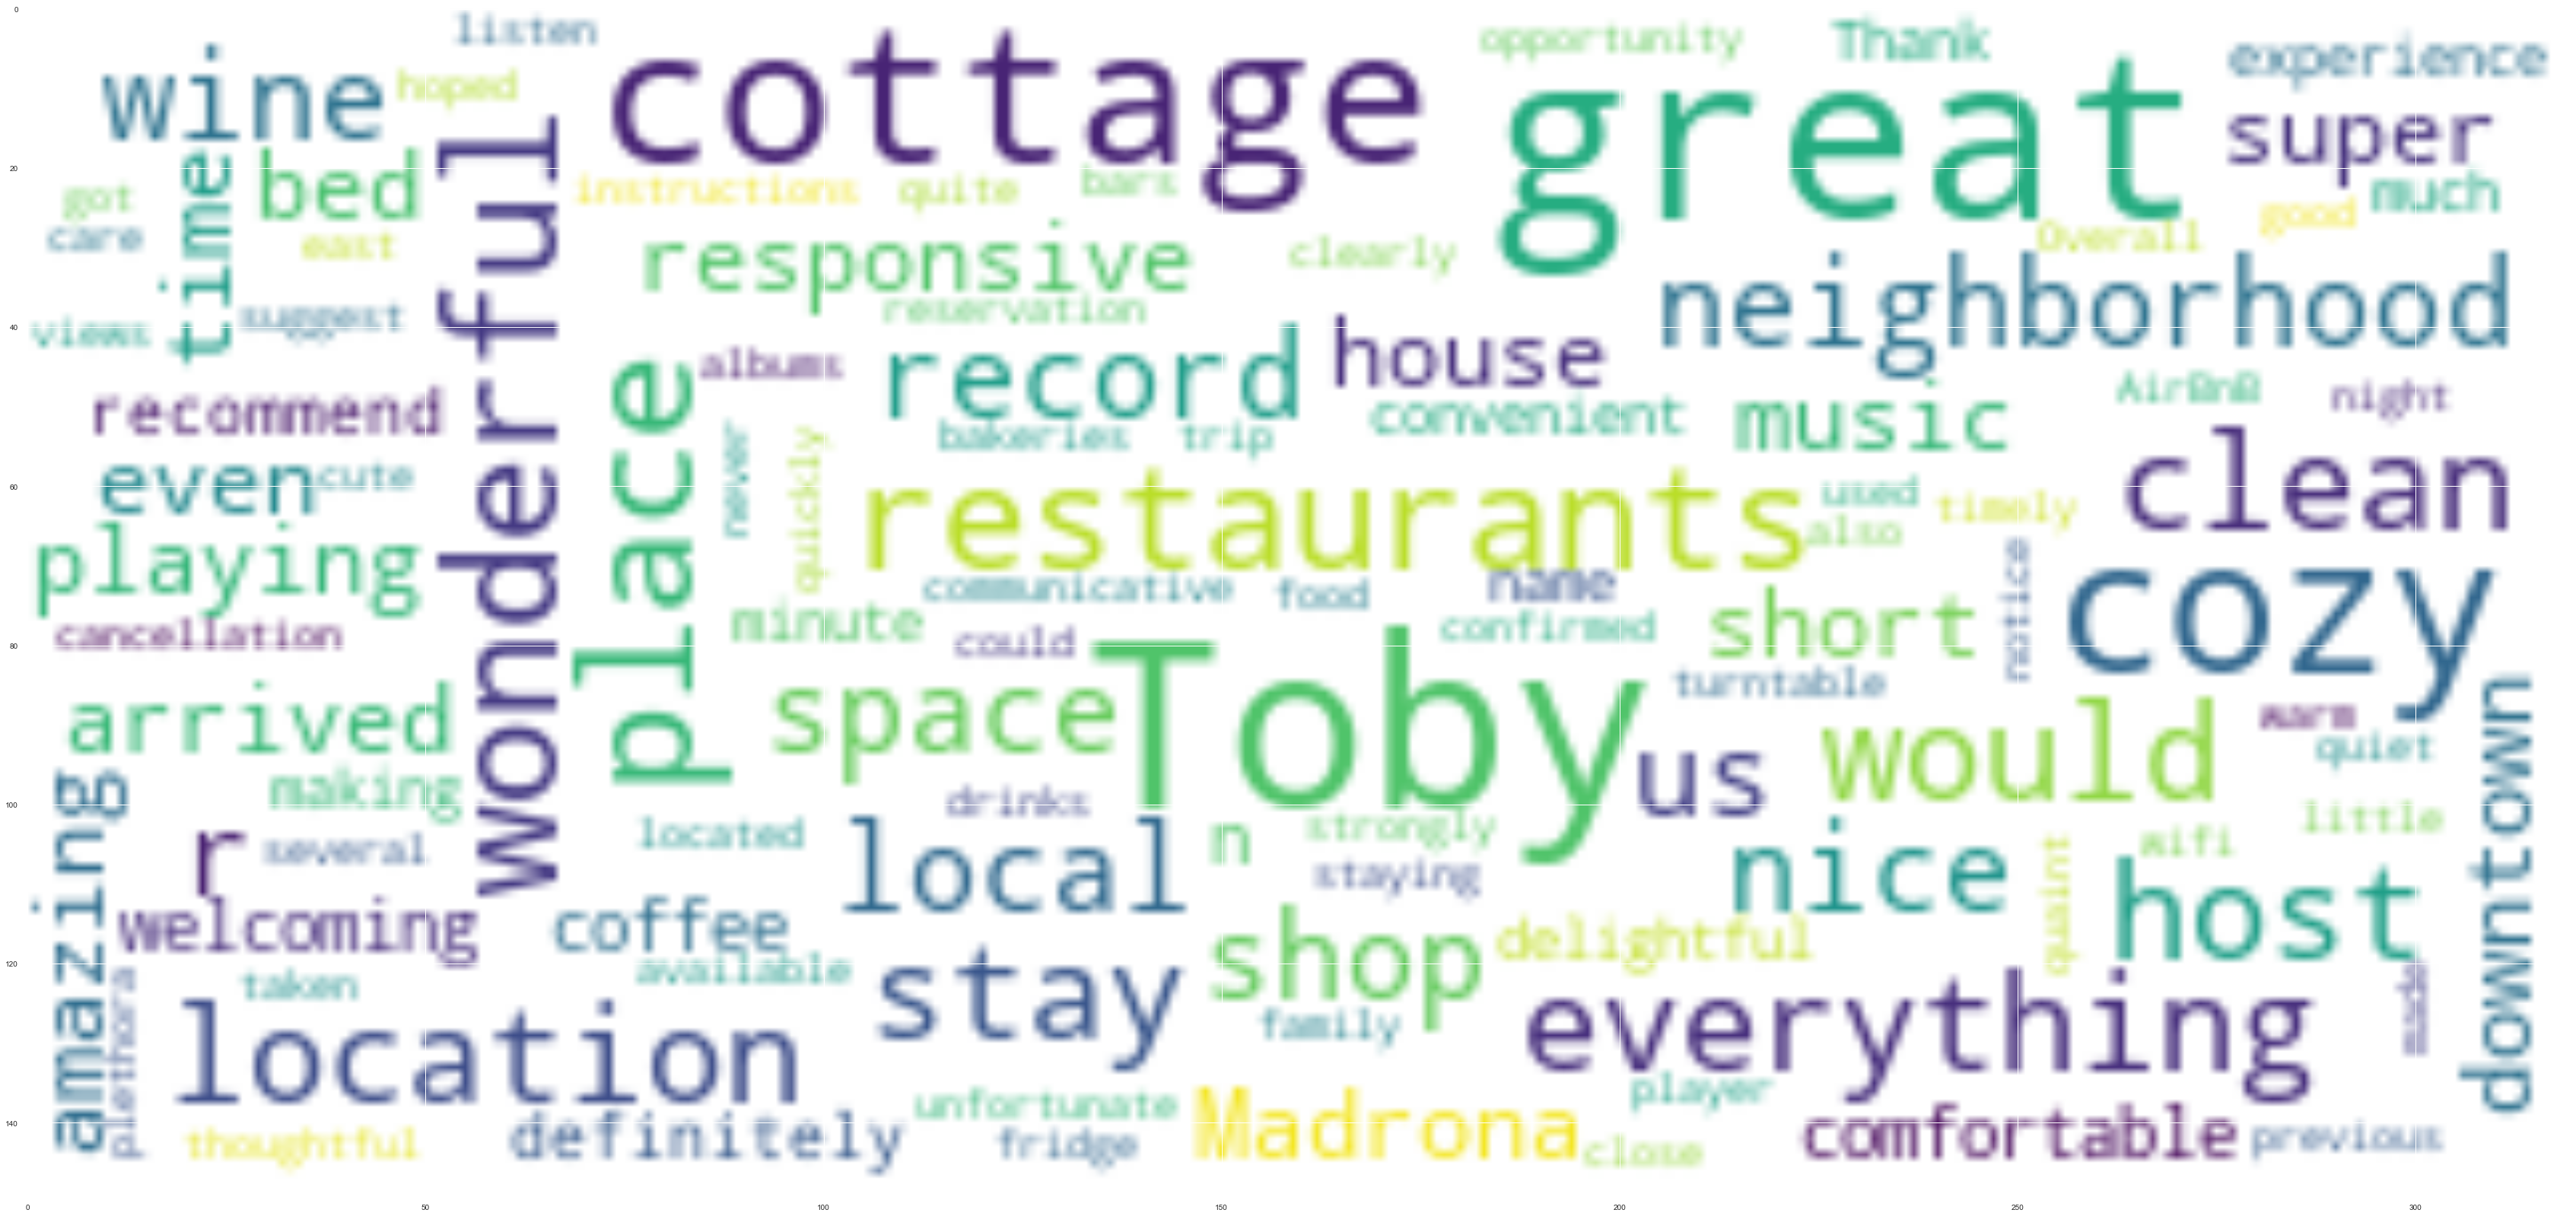

In [1056]:
text1 = reviewd1['comments']
wordcloud = WordCloud(width=320, height=150, max_font_size=30, min_font_size=5,background_color = 'white',
    stopwords = stop).generate(str(text1))
fig = plt.figure(
    figsize = (60, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('image1.png',dpi=60)
plt.show()


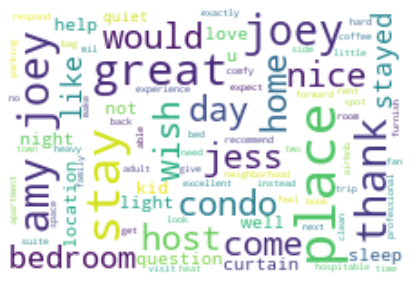

In [1012]:
reviewd5=reviewd[reviewd['listing_id']==similar_id[5]]
reviewd5['comments']=reviewd5['comments'].apply(lambda x:clean_text_round1(x))
reviewd5['comments']=reviewd5['comments'].apply(lambda x:clean_text_round2(x))
reviewd5['comments']=reviewd5['comments'].apply(lambda x : lemmatization1(x))
text5 = reviewd5['comments']
wordcloud = WordCloud(width=220, height=150, max_font_size=30, min_font_size=5,background_color = 'white',
    stopwords = stop).generate(str(text5))
fig = plt.figure(
    figsize = (10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('image5.png')
plt.show()